<a href="https://colab.research.google.com/github/Retro6727/MLExperiments/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
# df = pd.read_csv('personality_dataset.csv')
# df.head()

In [15]:
data = os.path.join('personality_dataset.csv')
df = pd.read_csv(data)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [21]:
print("Summary stats:\n", df.describe())

Summary stats:
        Time_spent_Alone  ...  Post_frequency
count       2837.000000  ...     2835.000000
mean           4.505816  ...        3.564727
std            3.479192  ...        2.926582
min            0.000000  ...        0.000000
25%            2.000000  ...        1.000000
50%            4.000000  ...        3.000000
75%            8.000000  ...        6.000000
max           11.000000  ...       10.000000

[8 rows x 5 columns]


In [22]:
df.dtypes

,0
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64
Personality,object


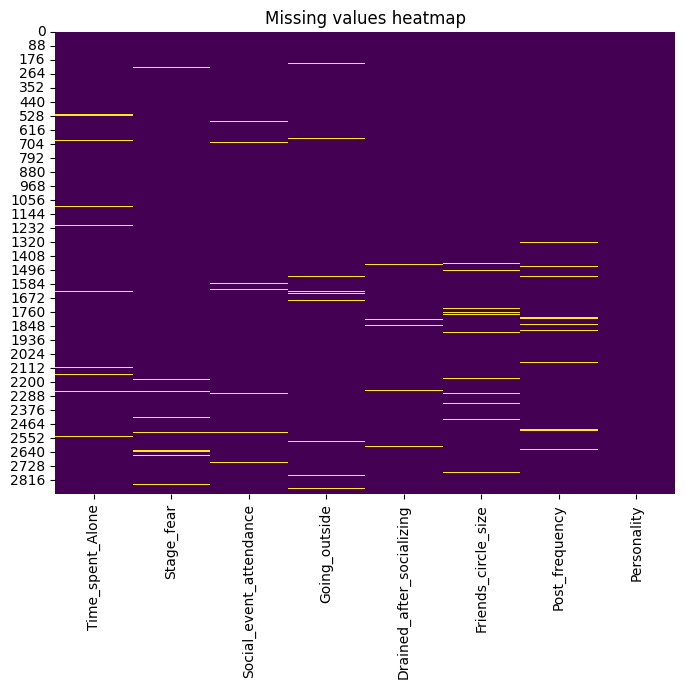

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values heatmap")
plt.show()

In [26]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns \n", categorical_cols)
print("Numerical Columns \n", numerical_cols)

Categorical Columns 
 Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')
Numerical Columns 
 Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


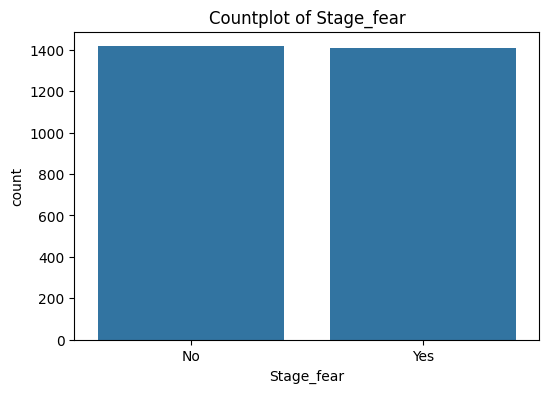

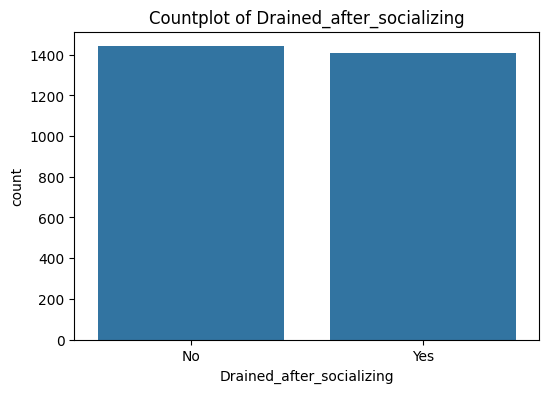

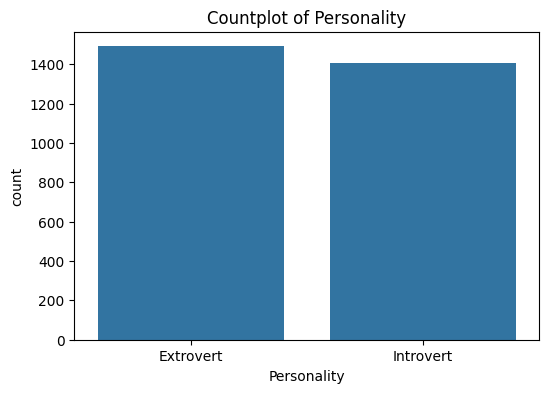

In [27]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()

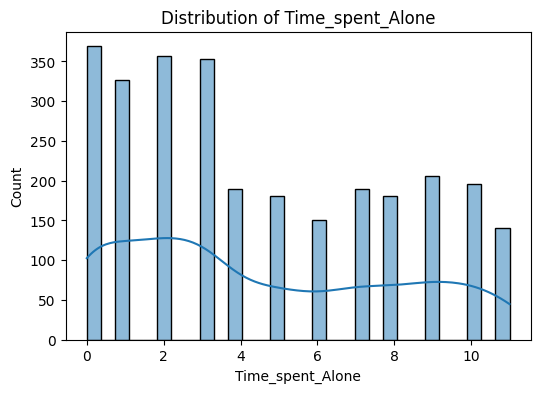

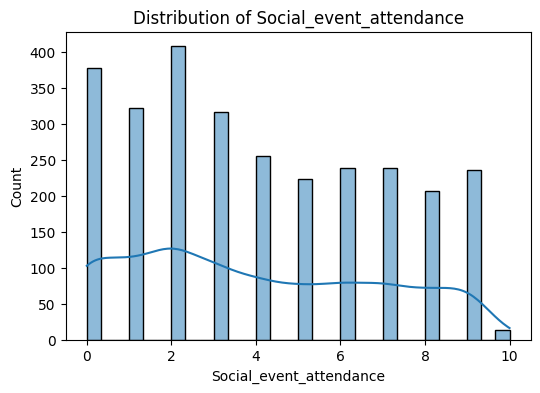

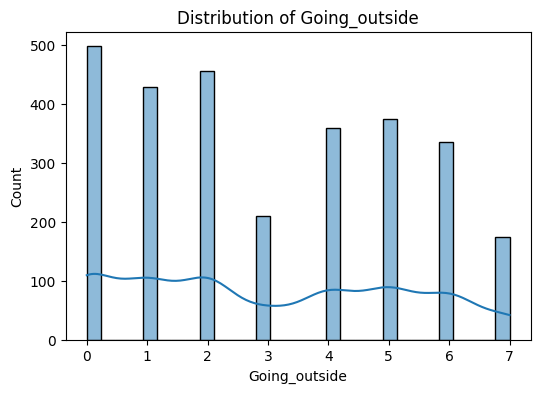

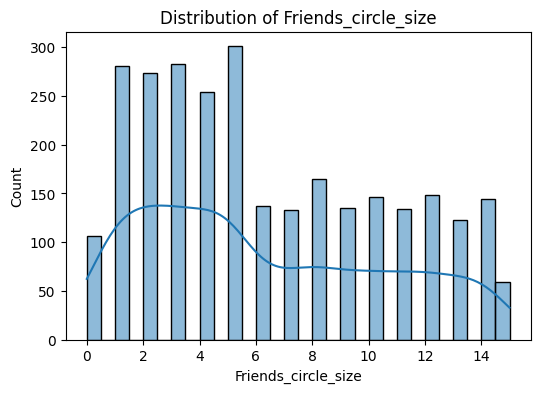

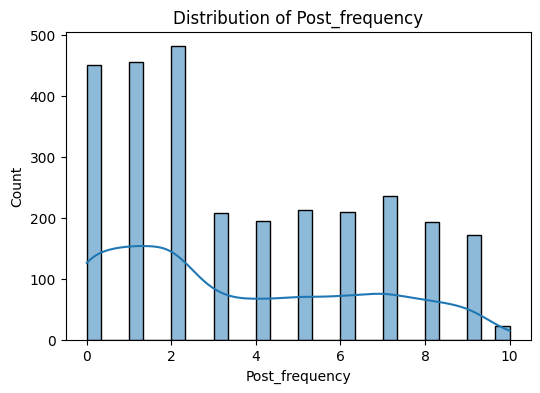

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

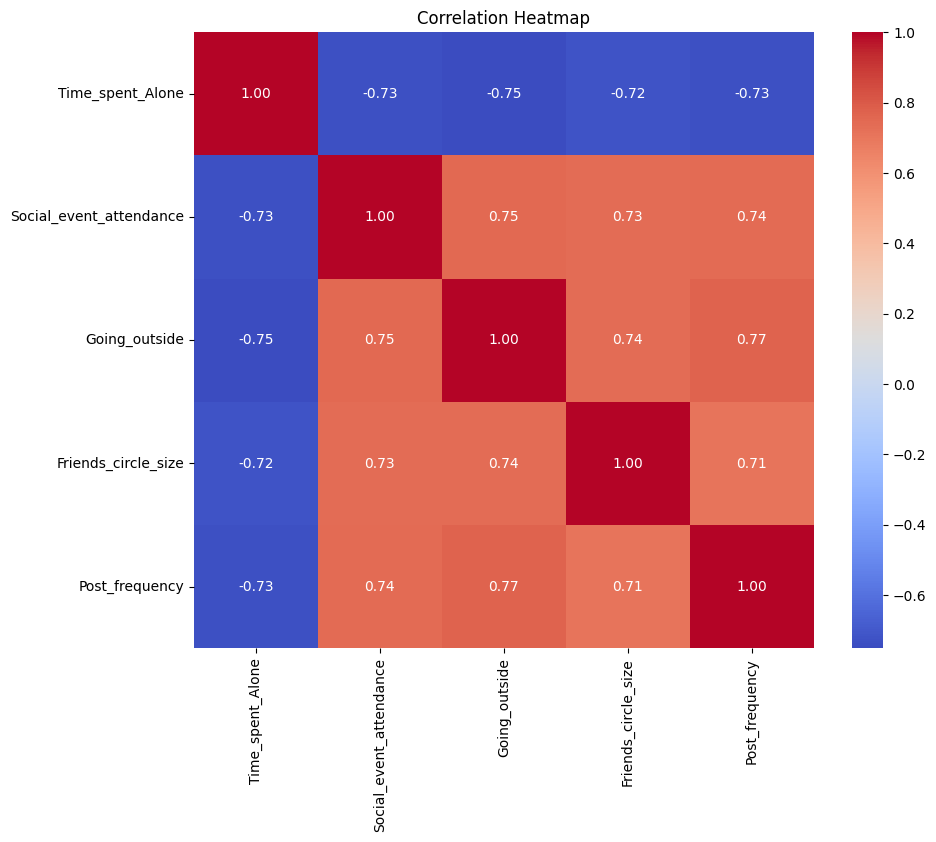

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

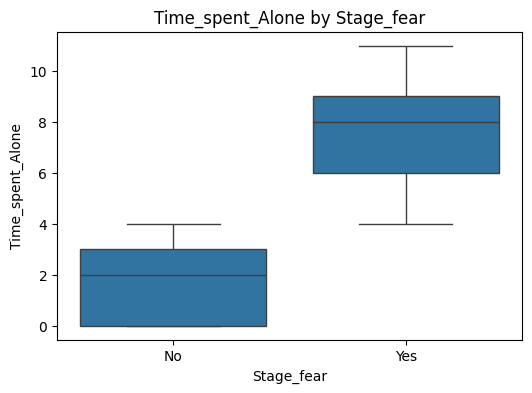

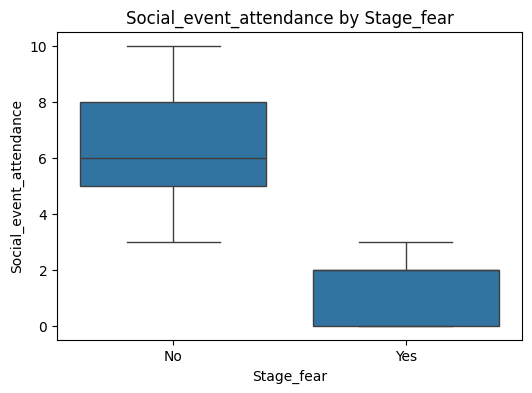

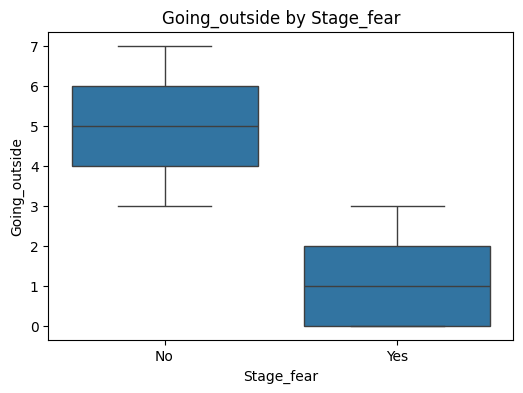

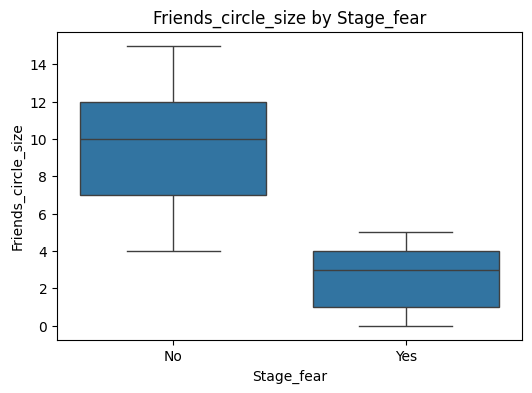

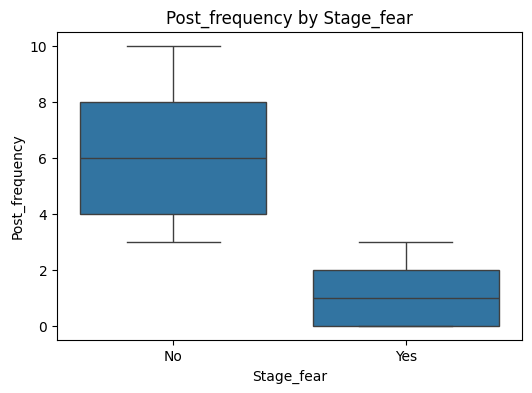

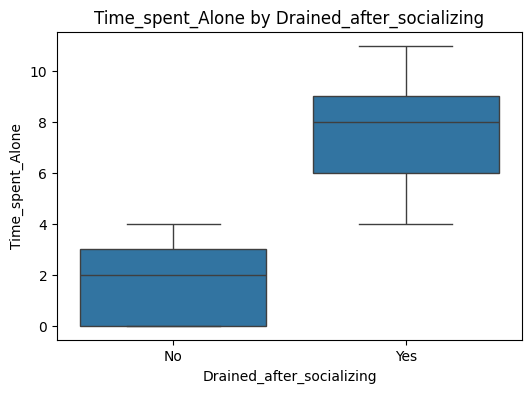

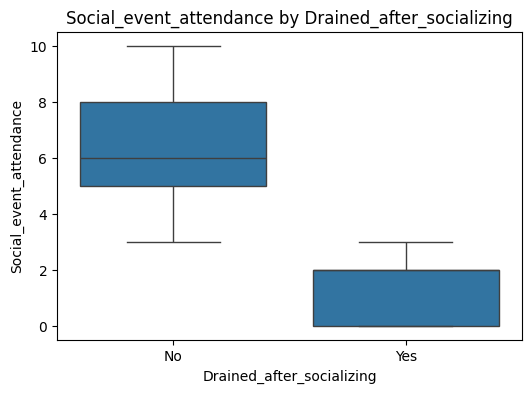

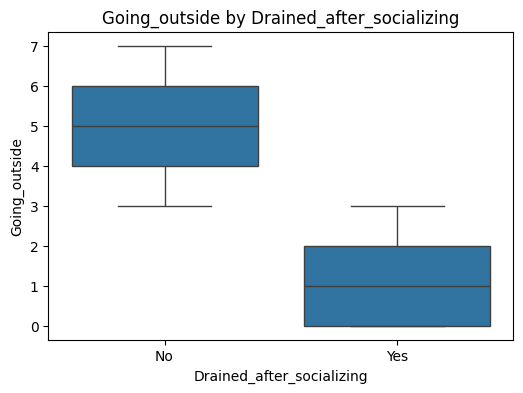

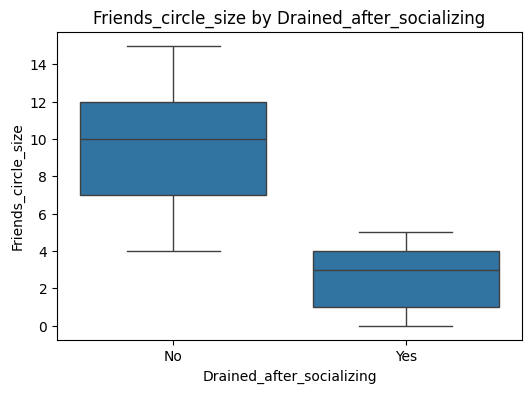

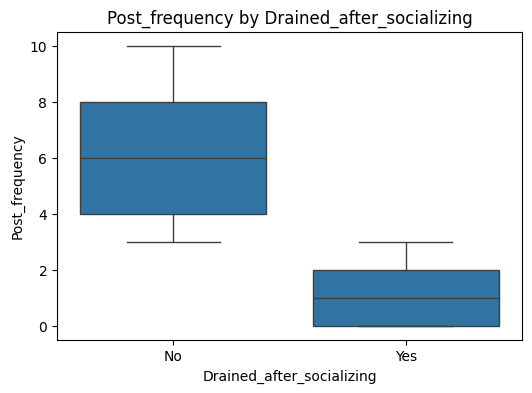

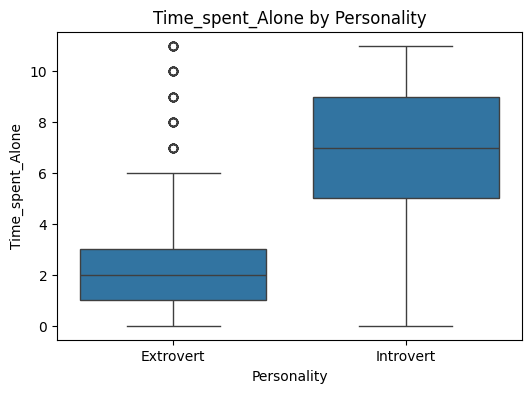

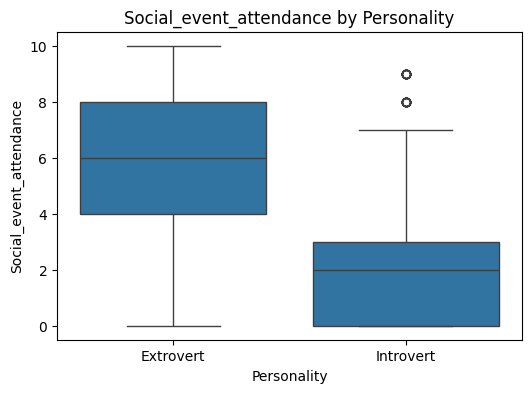

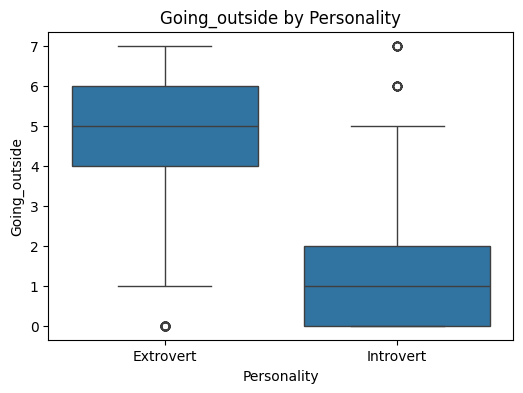

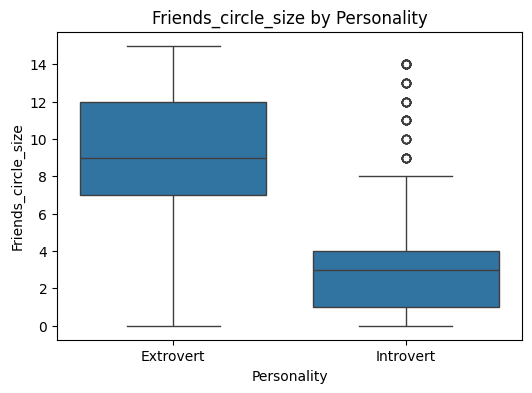

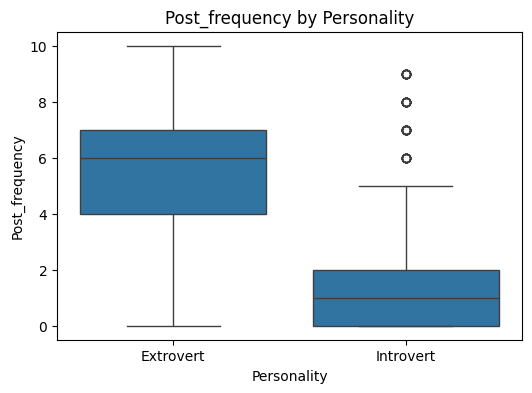

In [32]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f"{num_col} by {cat_col}")
        plt.show()